In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

In [71]:
f = open('/Users/Raafe/Desktop/DataDriven/Project/Stever.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])

In [72]:
data.columns=['Time','Power','Temperature']
data1=data

In [73]:
data1['Temperature'] = pd.to_numeric(data1['Temperature'], errors='coerce')
data1['Power'] = pd.to_numeric(data1['Power'], errors='coerce')
data1['Time']=pd.to_datetime(data1['Time'],errors='coerce')

In [74]:
data1=data.set_index('Time',drop=False)
data1.dtypes
data2=data1.drop(data1.columns[0],axis=1)
data3=data2.resample('H').mean()
data4=data3.interpolate()
df=data4

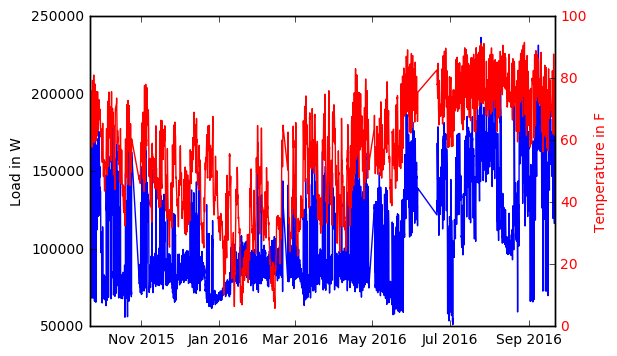

In [75]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df.Power)
ax1.set_ylabel('Load in W')

ax2 = ax1.twinx()
ax2.plot(df.Temperature, 'r-')
ax2.set_ylabel('Temperature in F', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

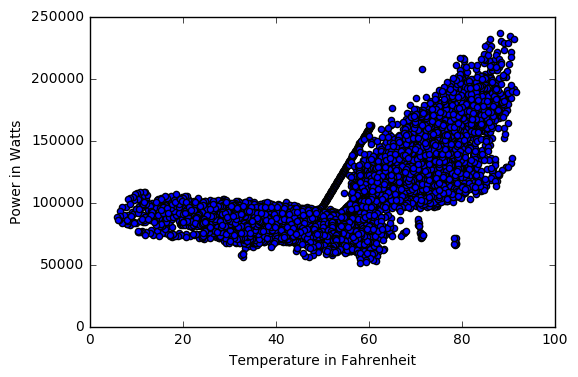

In [76]:
plt.scatter(df.Temperature,df.Power)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Power in Watts')

In [77]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(df[['Temperature']], df['Power'])
print(clf.feature_importances_)

[ 1.]


In [78]:
clf.score(df[['Temperature']], df['Power'])

0.99997129341166935

In [82]:
df.median()

Power          98790.240626
Temperature       58.482674
dtype: float64

In [102]:
Value=[]

for row in df['Power']:
    if row>98790.240626:
        Value.append(1)
    else:
        Value.append(-1)
        
df['Value']=Value
df

,Power,Temperature,Value
Time,,,
2015-09-21 12:00:00,156793.922998,71.997171,1
2015-09-21 13:00:00,156320.852098,72.682589,1
2015-09-21 14:00:00,156728.131008,72.262695,1
2015-09-21 15:00:00,162151.462515,71.309107,1
2015-09-21 16:00:00,155263.055733,68.732773,1
2015-09-21 17:00:00,152140.094023,66.576382,1
2015-09-21 18:00:00,146004.257567,65.903200,1
2015-09-21 19:00:00,141306.997673,64.521090,1
2015-09-21 20:00:00,140053.207567,63.697288,1
